In [162]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering as AC
%matplotlib inline
plt.style.use('seaborn')

In [163]:
crimes1 = pd.read_csv('G:\islr_datasets\Chicago_Crimes_2005_to_2007.csv',error_bad_lines=False)
crimes2 = pd.read_csv('G:\islr_datasets\Chicago_Crimes_2008_to_2011.csv',error_bad_lines=False)
crimes3 = pd.read_csv('G:\islr_datasets\Chicago_Crimes_2012_to_2017.csv',error_bad_lines=False)
crimes = pd.concat([crimes1, crimes2, crimes3], ignore_index=False, axis=0)

print('Dataset ready..')

b'Skipping line 533719: expected 23 fields, saw 24\n'
b'Skipping line 1149094: expected 23 fields, saw 41\n'


Dataset ready..


In [164]:
print('Dataset Shape before drop_duplicate : ', crimes.shape)
crimes.drop_duplicates(subset=['ID', 'Case Number'], inplace=True)
print('Dataset Shape after drop_duplicate: ', crimes.shape)

Dataset Shape before drop_duplicate :  (6017767, 23)
Dataset Shape after drop_duplicate:  (4336556, 23)


In [165]:
crimes.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,0,4673626,HM274058,04/02/2006 01:00:00 PM,055XX N MANGO AVE,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,...,45.0,11.0,26,1136872.0,1936499.0,2006,04/15/2016 08:55:02 AM,41.981913,-87.771996,"(41.981912692, -87.771996382)"
1,1,4673627,HM202199,02/26/2006 01:40:48 PM,065XX S RHODES AVE,2017,NARCOTICS,MANU/DELIVER:CRACK,SIDEWALK,True,...,20.0,42.0,18,1181027.0,1861693.0,2006,04/15/2016 08:55:02 AM,41.775733,-87.611920,"(41.775732538, -87.611919814)"
2,2,4673628,HM113861,01/08/2006 11:16:00 PM,013XX E 69TH ST,051A,ASSAULT,AGGRAVATED: HANDGUN,OTHER,False,...,5.0,69.0,04A,1186023.0,1859609.0,2006,04/15/2016 08:55:02 AM,41.769897,-87.593671,"(41.769897392, -87.593670899)"
3,4,4673629,HM274049,04/05/2006 06:45:00 PM,061XX W NEWPORT AVE,0460,BATTERY,SIMPLE,RESIDENCE,False,...,38.0,17.0,08B,1134772.0,1922299.0,2006,04/15/2016 08:55:02 AM,41.942984,-87.780057,"(41.942984005, -87.780056951)"
4,5,4673630,HM187120,02/17/2006 09:03:14 PM,037XX W 60TH ST,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,ALLEY,True,...,13.0,65.0,18,1152412.0,1864560.0,2006,04/15/2016 08:55:02 AM,41.784211,-87.716745,"(41.784210853, -87.71674491)"


In [166]:
crimes.drop(['Unnamed: 0', 'Case Number', 'IUCR', 'X Coordinate', 'Y Coordinate','Updated On','Year', 'FBI Code', 'Beat','Ward','Community Area', 'Location', 'District'], inplace=True, axis=1)

In [167]:
crimes.shape

(4336556, 10)

In [168]:
# convert dates to pandas datetime format
crimes.Date = pd.to_datetime(crimes.Date, format='%m/%d/%Y %I:%M:%S %p')
# setting the index to be the date will help us a lot later on
crimes.index = pd.DatetimeIndex(crimes.Date)

In [169]:
crimes.head()

,ID,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic,Latitude,Longitude
Date,,,,,,,,,,
2006-04-02 13:00:00,4673626,2006-04-02 13:00:00,055XX N MANGO AVE,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False,41.981913,-87.771996
2006-02-26 13:40:48,4673627,2006-02-26 13:40:48,065XX S RHODES AVE,NARCOTICS,MANU/DELIVER:CRACK,SIDEWALK,True,False,41.775733,-87.611920
2006-01-08 23:16:00,4673628,2006-01-08 23:16:00,013XX E 69TH ST,ASSAULT,AGGRAVATED: HANDGUN,OTHER,False,False,41.769897,-87.593671
2006-04-05 18:45:00,4673629,2006-04-05 18:45:00,061XX W NEWPORT AVE,BATTERY,SIMPLE,RESIDENCE,False,False,41.942984,-87.780057
2006-02-17 21:03:14,4673630,2006-02-17 21:03:14,037XX W 60TH ST,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,ALLEY,True,False,41.784211,-87.716745


In [170]:
# convert dates to pandas datetime format
crimes.Date = pd.to_datetime(crimes.Date, format='%m/%d/%Y %I:%M:%S %p')
# setting the index to be the date will help us a lot later on
crimes.index = pd.DatetimeIndex(crimes.Date)

In [171]:
crimes.head()

,ID,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic,Latitude,Longitude
Date,,,,,,,,,,
2006-04-02 13:00:00,4673626,2006-04-02 13:00:00,055XX N MANGO AVE,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False,41.981913,-87.771996
2006-02-26 13:40:48,4673627,2006-02-26 13:40:48,065XX S RHODES AVE,NARCOTICS,MANU/DELIVER:CRACK,SIDEWALK,True,False,41.775733,-87.611920
2006-01-08 23:16:00,4673628,2006-01-08 23:16:00,013XX E 69TH ST,ASSAULT,AGGRAVATED: HANDGUN,OTHER,False,False,41.769897,-87.593671
2006-04-05 18:45:00,4673629,2006-04-05 18:45:00,061XX W NEWPORT AVE,BATTERY,SIMPLE,RESIDENCE,False,False,41.942984,-87.780057
2006-02-17 21:03:14,4673630,2006-02-17 21:03:14,037XX W 60TH ST,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,ALLEY,True,False,41.784211,-87.716745


In [172]:
crimes.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4336556 entries, 2006-04-02 13:00:00 to 2016-05-03 23:38:00
Data columns (total 10 columns):
ID                      int64
Date                    datetime64[ns]
Block                   object
Primary Type            object
Description             object
Location Description    object
Arrest                  bool
Domestic                bool
Latitude                float64
Longitude               float64
dtypes: bool(2), datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 306.0+ MB


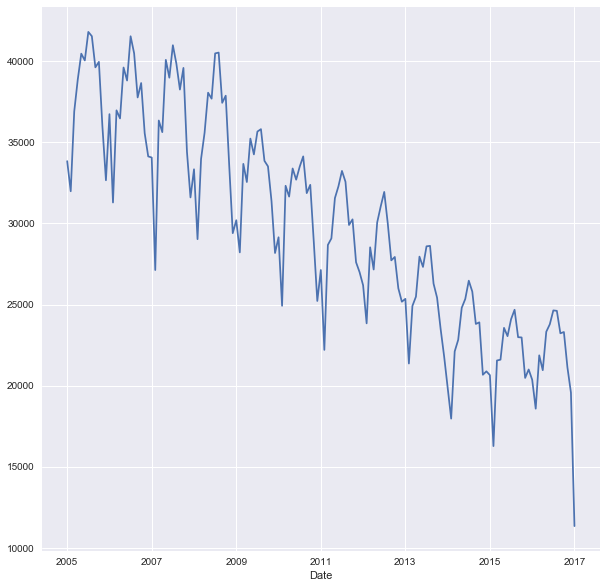

In [173]:
plt.figure(figsize = (10,10))
crimes.resample('M').size().plot(legend = False)
plt.show()

Wall time: 30 s


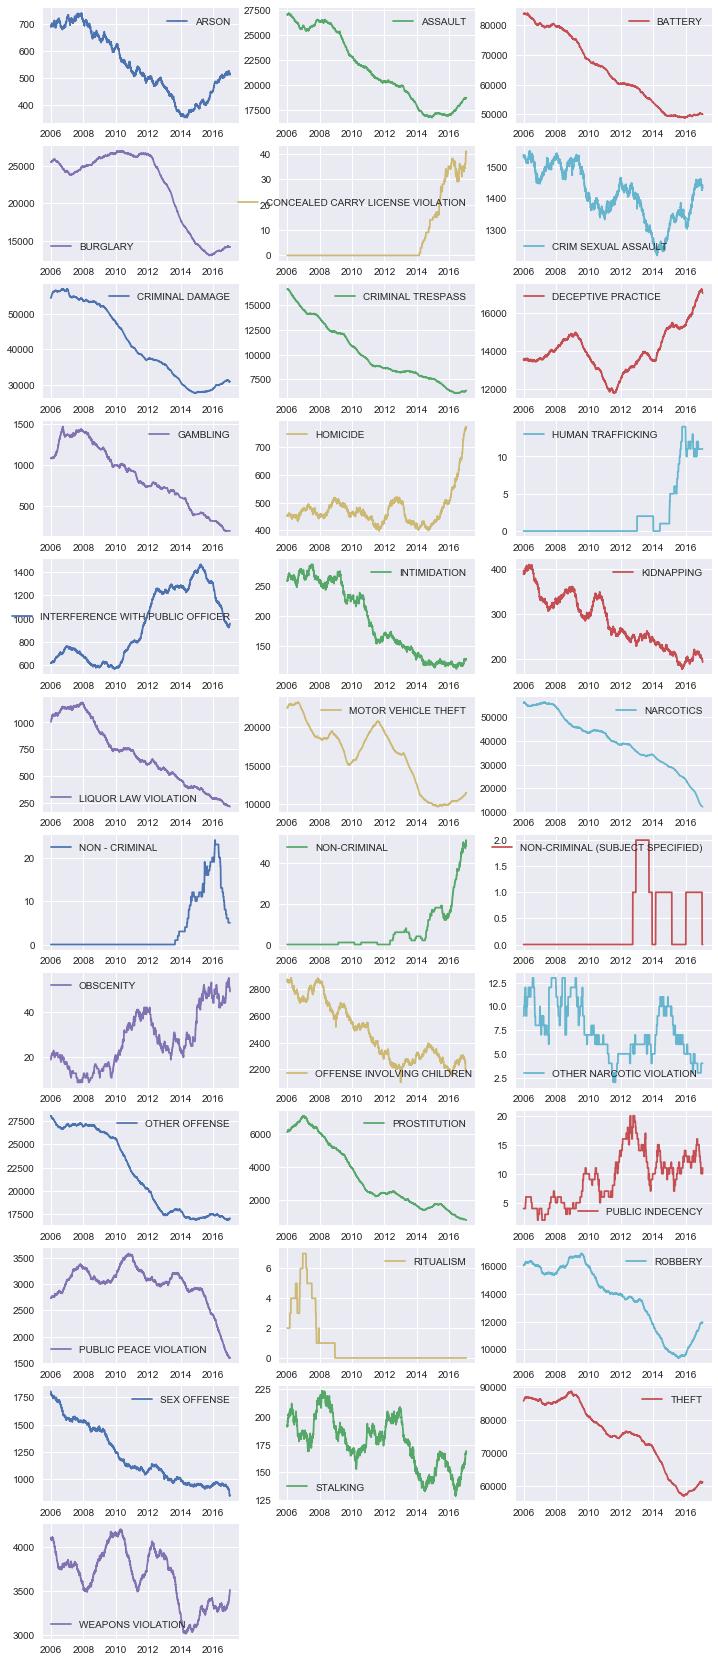

In [174]:
%%time
crimes_count_date = crimes.pivot_table( values = 'ID',aggfunc=np.size, columns='Primary Type', index=crimes.index.date, fill_value=0)
crimes_count_date.index = pd.DatetimeIndex(crimes_count_date.index)
plo = crimes_count_date.rolling(365).sum().plot(figsize=(12, 30), subplots=True, layout=(-1, 3), sharex=False, sharey=False)

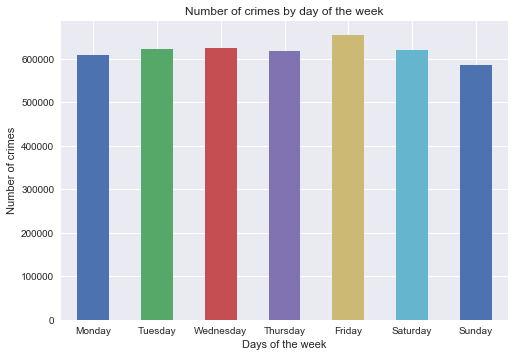

In [175]:
crimes.groupby([crimes.index.dayofweek]).size().plot(kind='bar')
days = ['Monday','Tuesday','Wednesday',  'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.xlabel('Days of the week')
plt.xticks(np.arange(7), days,rotation ='horizontal')
plt.ylabel('Number of crimes')
plt.title('Number of crimes by day of the week')
plt.show()

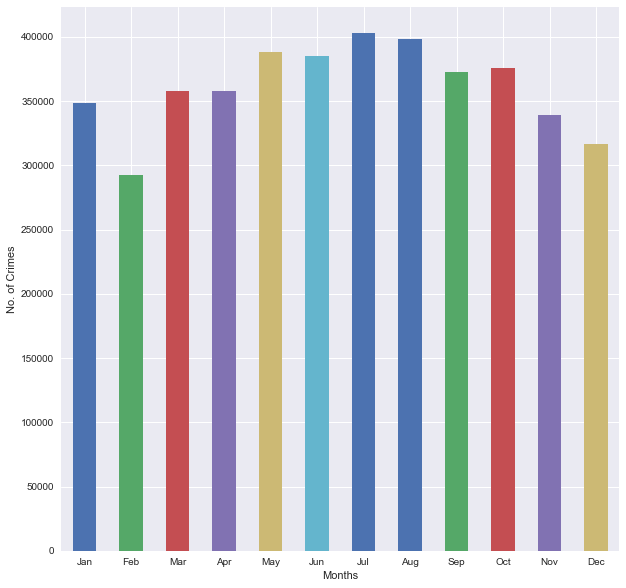

In [176]:
months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
plt.figure(figsize=(10,10))
crimes.groupby([crimes.index.month]).size().plot(kind='bar')
plt.xticks(np.arange(12),months,rotation = 'horizontal')
plt.xlabel('Months')
plt.ylabel('No. of Crimes')
plt.show()

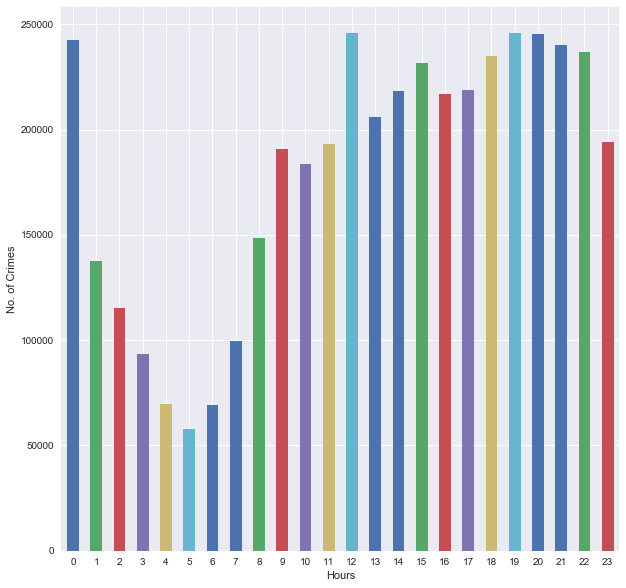

In [177]:
plt.figure(figsize=(10,10))
crimes.groupby([crimes.index.hour]).size().plot(kind='bar')
plt.xticks(np.arange(24),rotation = 'horizontal')
plt.xlabel('Hours')
plt.ylabel('No. of Crimes')
plt.show()

In [178]:
hour_by_type     = crimes.pivot_table(values='ID', index='Primary Type', columns=crimes.index.hour, aggfunc=np.size)

In [179]:
hour_by_type.fillna(0,inplace = True)

In [180]:
hour_by_type.head()

Date,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Primary Type,,,,,,,,,,,,,,,,,,,,,
ARSON,534.0,573.0,529.0,495.0,484.0,364.0,250.0,169.0,124.0,124.0,...,131.0,146.0,135.0,166.0,185.0,233.0,262.0,342.0,399.0,425.0
ASSAULT,8453.0,6708.0,5688.0,4117.0,2979.0,2411.0,2876.0,4874.0,9031.0,11369.0,...,16502.0,17694.0,15848.0,15456.0,15301.0,14890.0,14595.0,13437.0,12004.0,10210.0
BATTERY,38087.0,37820.0,33963.0,27990.0,19355.0,13057.0,11146.0,13839.0,20721.0,24380.0,...,38410.0,43316.0,38941.0,38161.0,39723.0,41177.0,42489.0,43814.0,44041.0,41554.0
BURGLARY,11224.0,5699.0,5342.0,4956.0,4823.0,5696.0,8631.0,14495.0,18149.0,16525.0,...,13253.0,13150.0,12277.0,12664.0,12560.0,10627.0,9672.0,9410.0,9705.0,7367.0
CONCEALED CARRY LICENSE VIOLATION,7.0,5.0,5.0,2.0,2.0,4.0,3.0,4.0,4.0,1.0,...,2.0,0.0,4.0,5.0,5.0,5.0,5.0,3.0,7.0,5.0


In [181]:
def scale_df(df,axis=0):
    '''
    A utility function to scale numerical values (z-scale) to have a mean of zero
    and a unit variance.
    '''
    return (df - df.mean(axis=axis)) / df.std(axis=axis)


In [182]:
def plot_hmap(df, ix=None, cmap='bwr'):
    '''
    A function to plot heatmaps that show temporal patterns
    '''
    if ix is None:
        ix = np.arange(df.shape[0])
    plt.figure(figsize= (20,20))
    plt.imshow(df.iloc[ix,:], cmap=cmap)
    plt.colorbar(fraction=0.03)
    plt.yticks(np.arange(df.shape[0]), df.index[ix])
    plt.xticks(np.arange(df.shape[1]))
    plt.grid(False)
    plt.show()

In [204]:
def scale_and_plot(df, ix = None):
    '''
    A wrapper function to calculate the scaled values within each row of df and plot_hmap
    '''
    df_marginal_scaled = scale_df(df.T).T
    if ix is None:
        ix = AC(5).fit(df_marginal_scaled).labels_.argsort() # a trick to make better heatmaps
    cap = np.min([np.max(df_marginal_scaled.as_matrix()), np.abs(np.min(df_marginal_scaled.as_matrix()))])
    df_marginal_scaled = np.clip(df_marginal_scaled, -1*cap, cap)
    plot_hmap(df_marginal_scaled, ix=ix)
    
def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

# Without Agglomerative Clustering

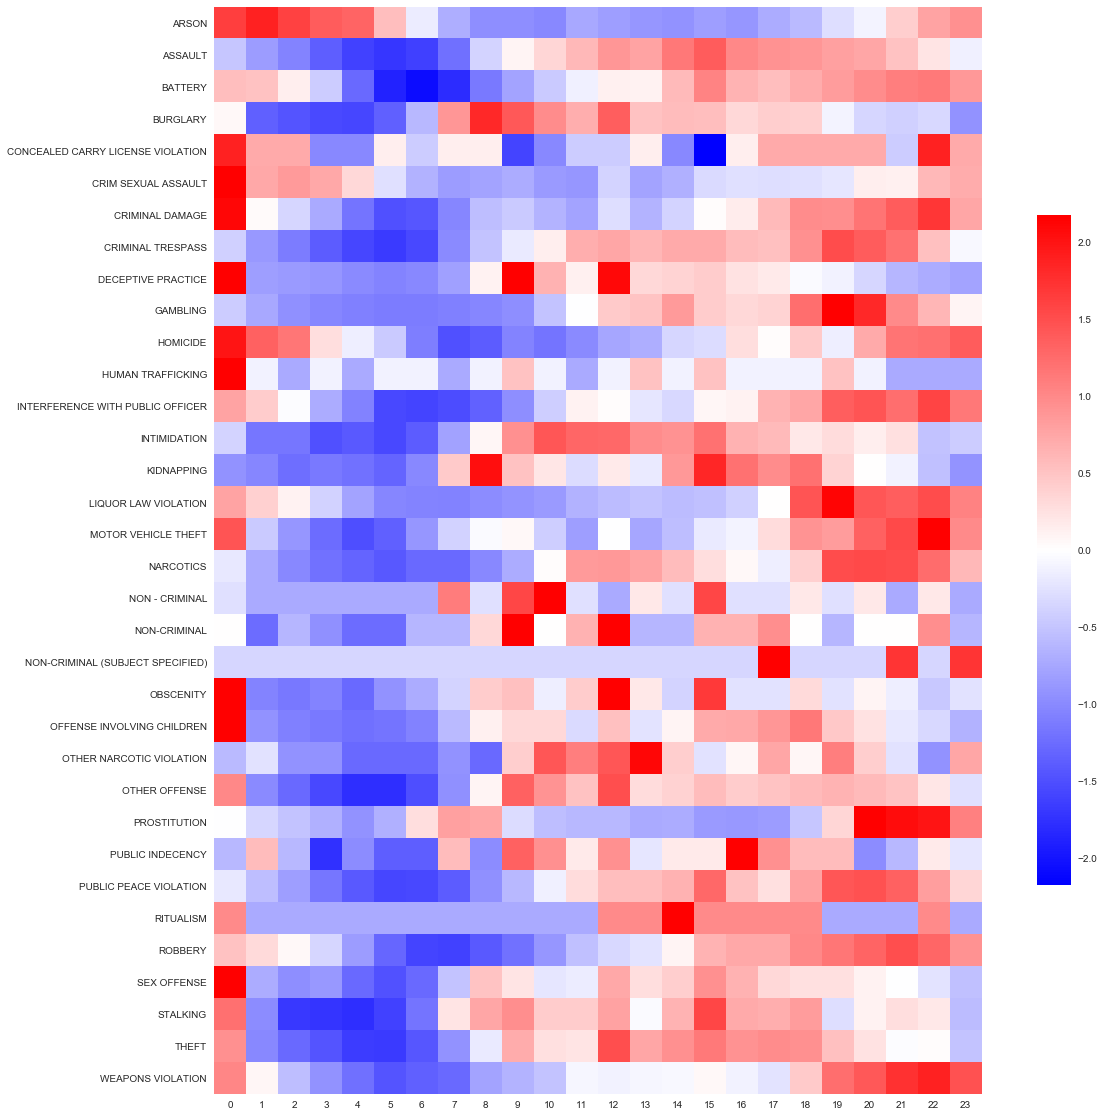

In [205]:
scale_and_plot(hour_by_type,ix = np.arange(len(hour_by_type)))

# With Agglomerative Clustering

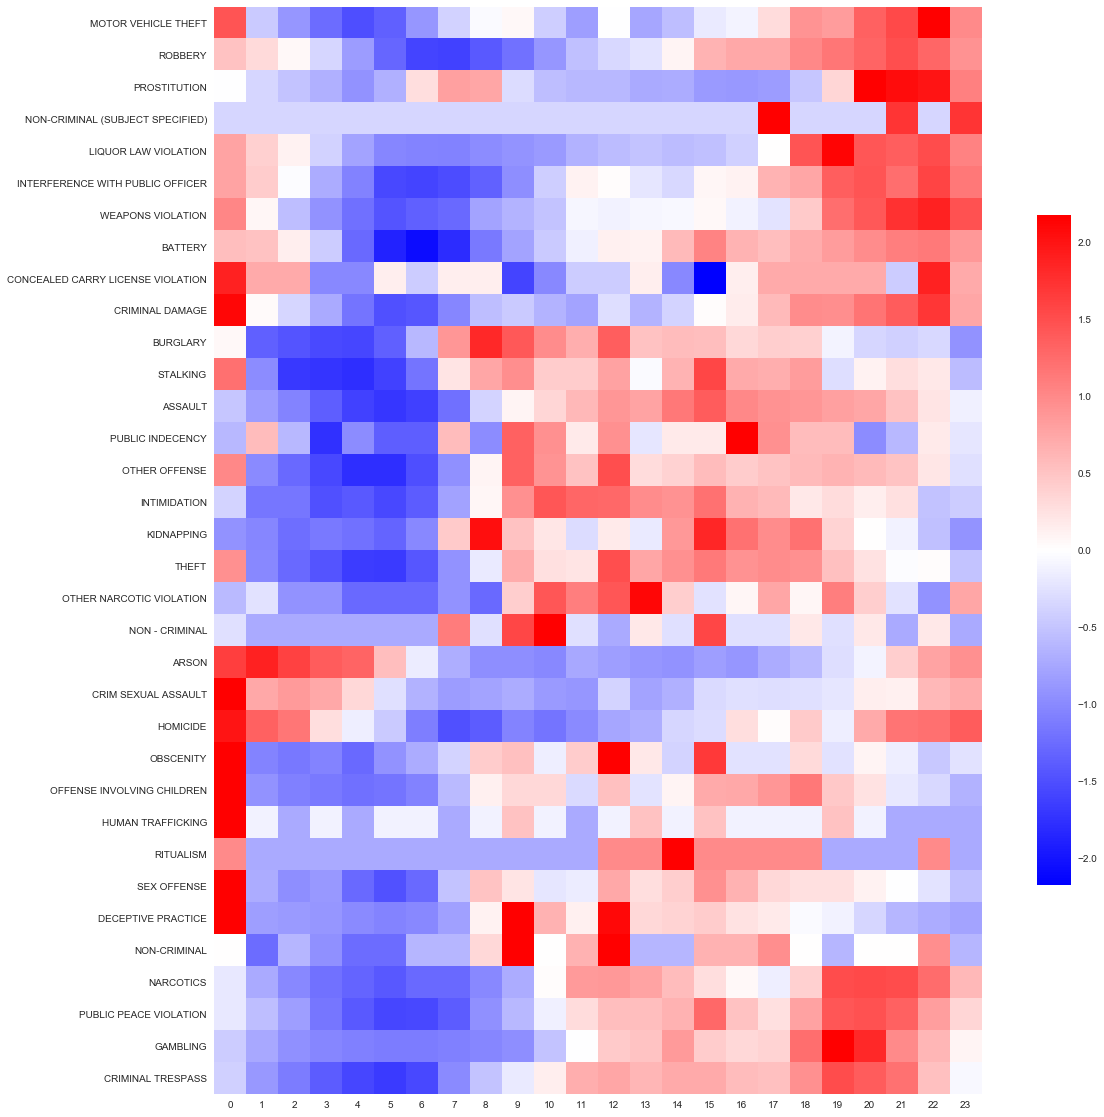

In [206]:
scale_and_plot(hour_by_type,ix = None)